In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
phoenix_ghi_ts = pd.read_csv('/content/drive/My Drive/data/323705_33.45_-112.06_tmy-2021.csv', skiprows=2)
maricopa_ghi_ts = pd.read_csv('/content/drive/My Drive/data/323715_33.05_-112.06_tdy-2022.csv', skiprows=2)
ny_ghi_ts = pd.read_csv('/content/drive/My Drive/data/1243965_40.73_-74.02_tdy-2022.csv', skiprows=2)
sb_ghi_ts = pd.read_csv('/content/drive/My Drive/data/SanBernandino.csv', skiprows=2)
ot_ghi_ts = pd.read_csv('/content/drive/My Drive/data/Otero.csv', skiprows=2)
in_ghi_ts = pd.read_csv('/content/drive/My Drive/data/Inyo.csv', skiprows=2)
hd_ghi_ts = pd.read_csv('/content/drive/My Drive/data/Hidalgo.csv', skiprows=2)
gl_ghi_ts = pd.read_csv('/content/drive/My Drive/data/Glades.csv', skiprows=2)

In [10]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from sklearn.metrics import mean_squared_error

def run_all(ghi_ts):
  data = data_prep(ghi_ts)
  print("DATA")
  print(data.head())
  print("*****************************************************************************************************************************")
  print("ADF TEST AND PACF ACF PLOTS")
  data_diff_check(data)
  print("*****************************************************************************************************************************")
  print("SARIMA MODEL")
  sarimax = model(data)
  print("*****************************************************************************************************************************")
  print("FORECAST")
  predict(sarimax)
  print("*****************************************************************************************************************************")



def data_prep(ghi_ts):
  ghi_ts['Datetime'] = pd.to_datetime(ghi_ts[['Year', 'Month', 'Day', 'Hour', 'Minute']])
  ghi_ts.set_index('Datetime', inplace=True)


  data = ghi_ts.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1)

  ghi_ts['GHI'] = pd.to_numeric(ghi_ts['GHI'], errors='coerce')

  data_daily = ghi_ts[['GHI']].resample('D').mean()

  return data_daily

def data_diff_check(data_daily):
  data_diff = data_daily.diff().dropna()
  data_seasonal_diff = data_daily.diff(7).dropna()

  adf_test = adfuller(data_diff['GHI'])
  adf_results = pd.DataFrame({
    'ADF Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations': adf_test[3],
  }, index=['Value'])

  print(adf_results)

  adf_test = adfuller(data_seasonal_diff['GHI'])

  adf_results = pd.DataFrame({
    'ADF Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations': adf_test[3],
  }, index=['Value'])

  print(adf_results)

  fig, axes = plt.subplots(1, 2, figsize=(15, 4))


  plot_acf(data_diff, ax=axes[0], lags=40)

  plot_pacf(data_diff, ax=axes[1], lags=40)

  plt.tight_layout()
  plt.show()

  return data_daily

def model(data_daily):
  p = 1  # AR order
  d = 1  # Differencing order
  q = 1  # MA order

  P = 0  # Seasonal AR order
  D = 1  # Seasonal differencing order
  Q = 2  # Seasonal MA order
  S = 7  # Seasonal periodicity


  sarima_model = SARIMAX(data_daily['GHI'],
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, S),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

  sarima_result = sarima_model.fit(method='nm')
  print(sarima_result.summary())
  return sarima_result

def predict(sarima_result):
  ghi_forecast = sarima_result.forecast(steps=7)
  print(ghi_forecast)
  return ghi_forecast

FILENAME:: Seminole.csv
DATA
                   GHI
Datetime              
1998-03-01  189.458333
1998-03-02  265.458333
1998-03-03  250.208333
1998-03-04  269.666667
1998-03-05  237.041667
*****************************************************************************************************************************
ADF TEST AND PACF ACF PLOTS
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value          -10.617482  5.625921e-19          7                     346
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value           -6.121551  8.830465e-08         14                     273


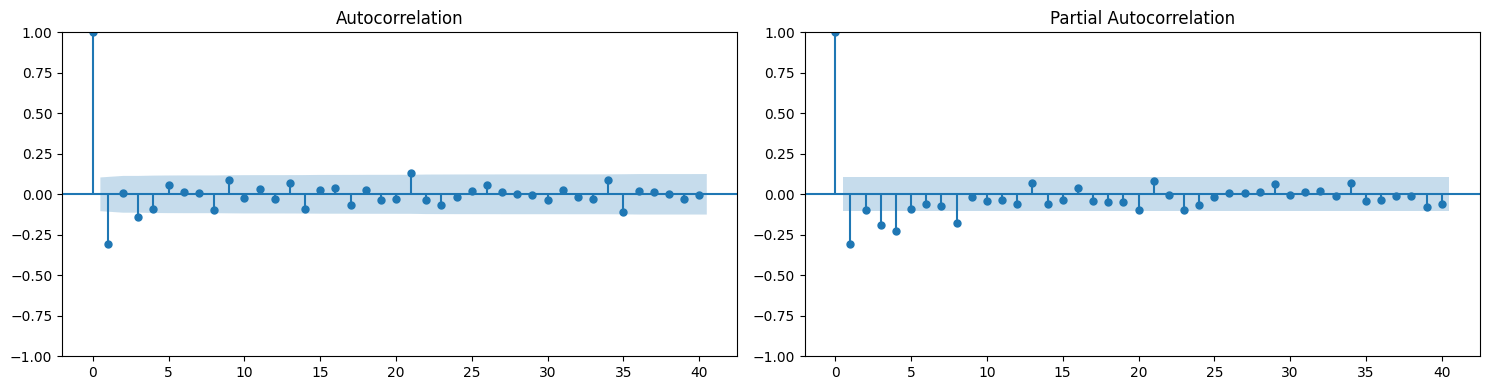

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 7550
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1949.815
Date:                                Wed, 24 Apr 2024   AIC                           3909.630
Time:                                        03:48:55   BIC                           3944.260
Sample:                                    03-01-1998   HQIC                          3921.519
                                         - 10-31-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4374      0.038     11.464      0.000       0.363       0.512
ma.

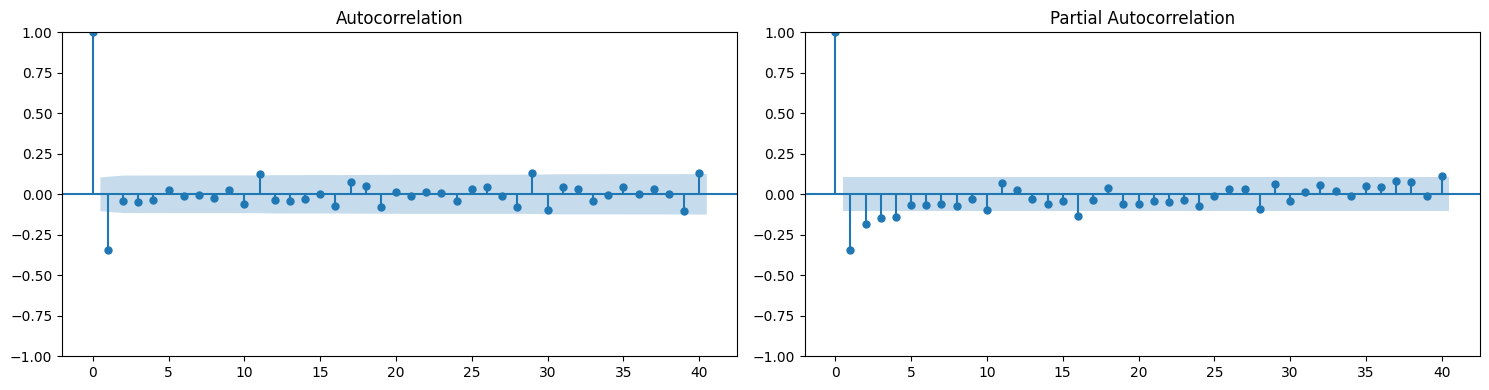

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 8493
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1779.498
Date:                                Wed, 24 Apr 2024   AIC                           3568.995
Time:                                        03:49:05   BIC                           3604.216
Sample:                                    08-01-1999   HQIC                          3581.016
                                         - 10-31-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0188      0.122     -0.154      0.878      -0.259       0.221
ma.

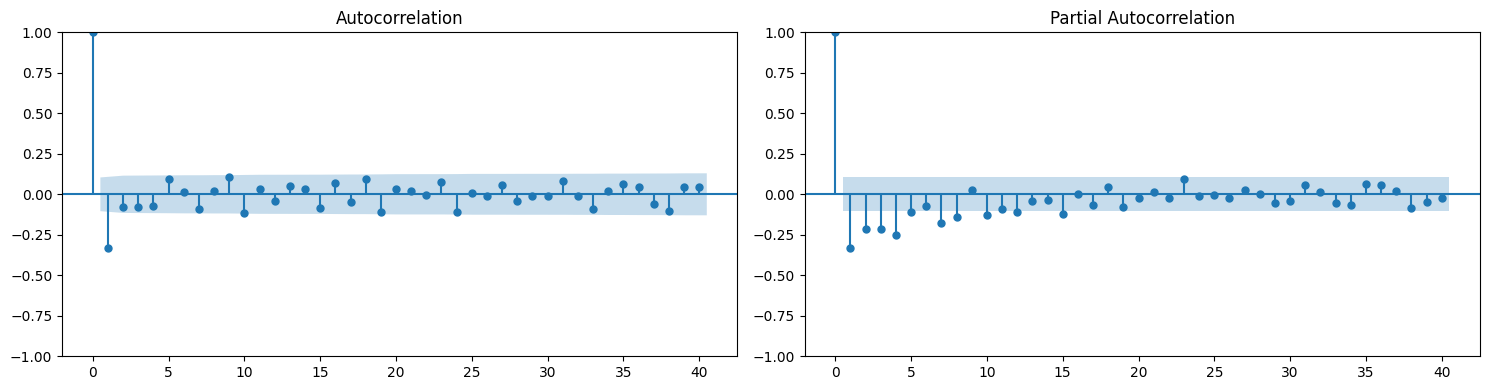

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 7455
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1941.279
Date:                                Wed, 24 Apr 2024   AIC                           3892.557
Time:                                        03:49:15   BIC                           3927.125
Sample:                                    02-01-1999   HQIC                          3904.433
                                         - 06-30-2019                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2031      0.047      4.351      0.000       0.112       0.295
ma.

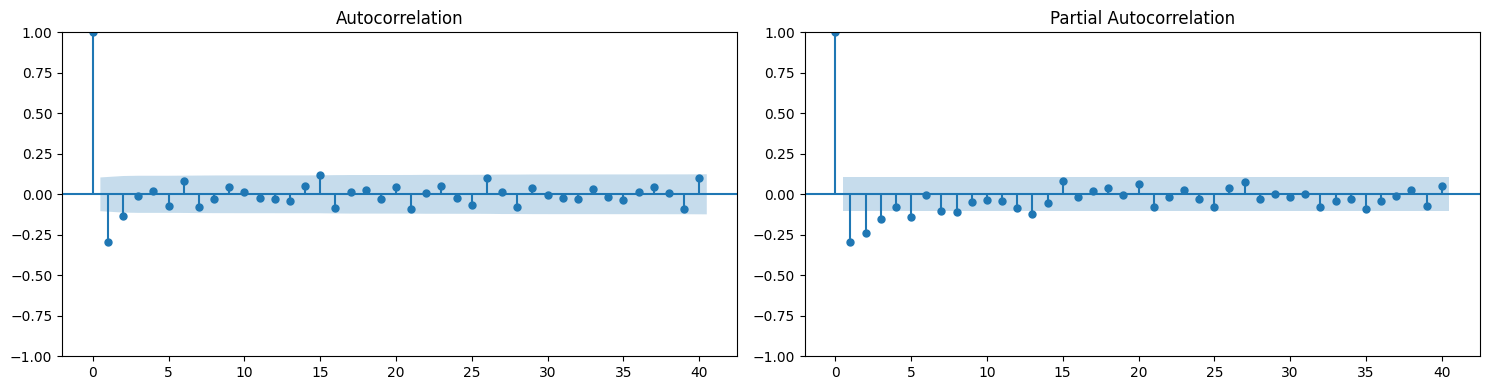

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 6912
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1901.905
Date:                                Wed, 24 Apr 2024   AIC                           3813.810
Time:                                        03:49:24   BIC                           3847.997
Sample:                                    03-01-2002   HQIC                          3825.600
                                         - 01-31-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0582      0.049      1.198      0.231      -0.037       0.153
ma.

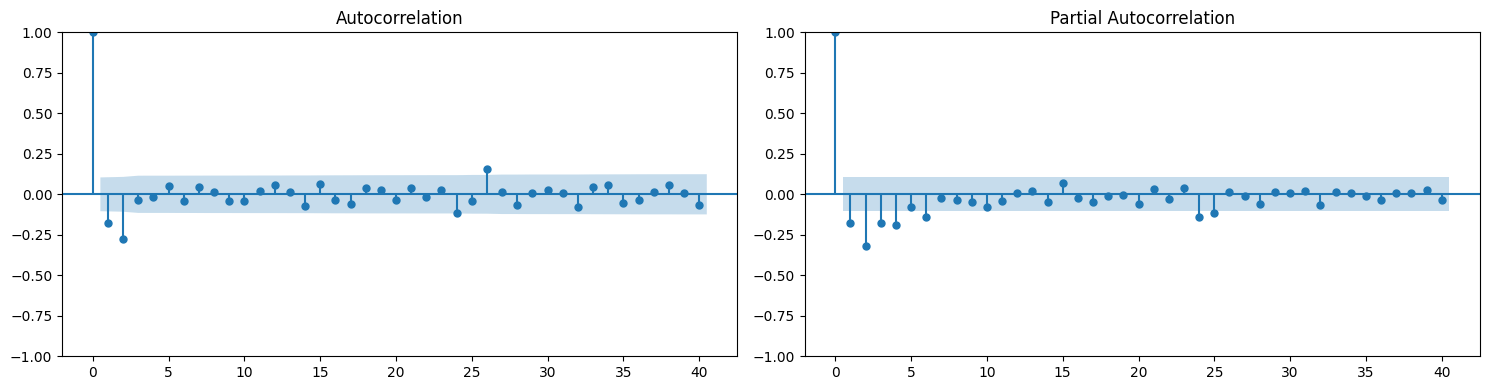

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 8491
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1908.124
Date:                                Wed, 24 Apr 2024   AIC                           3826.249
Time:                                        03:49:32   BIC                           3861.468
Sample:                                    01-01-1999   HQIC                          3838.270
                                         - 03-31-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5869      0.023     25.457      0.000       0.542       0.632
ma.

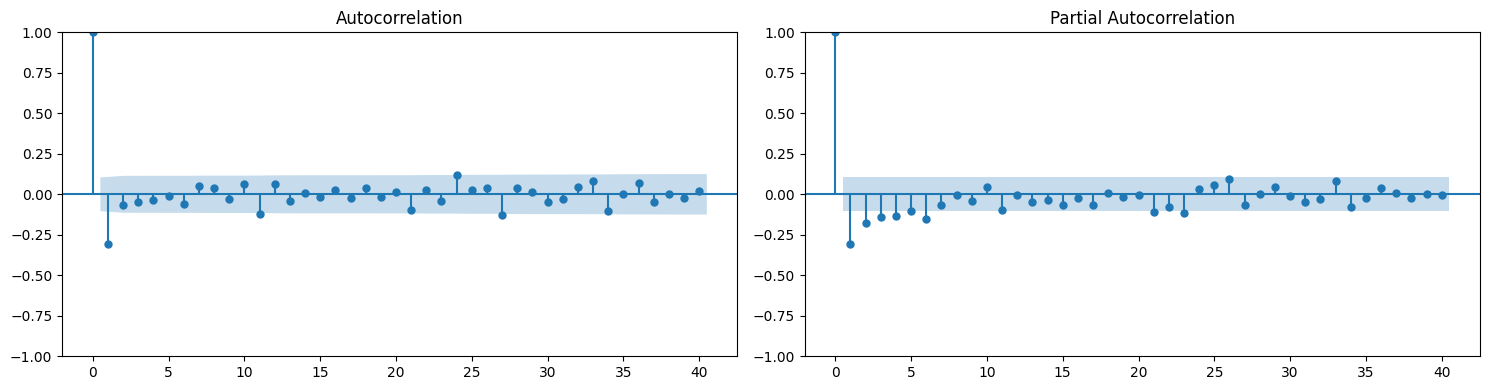

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 8005
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1715.886
Date:                                Wed, 24 Apr 2024   AIC                           3441.772
Time:                                        03:49:41   BIC                           3476.696
Sample:                                    08-01-1998   HQIC                          3453.728
                                         - 06-30-2020                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1802      0.078      2.318      0.020       0.028       0.333
ma.

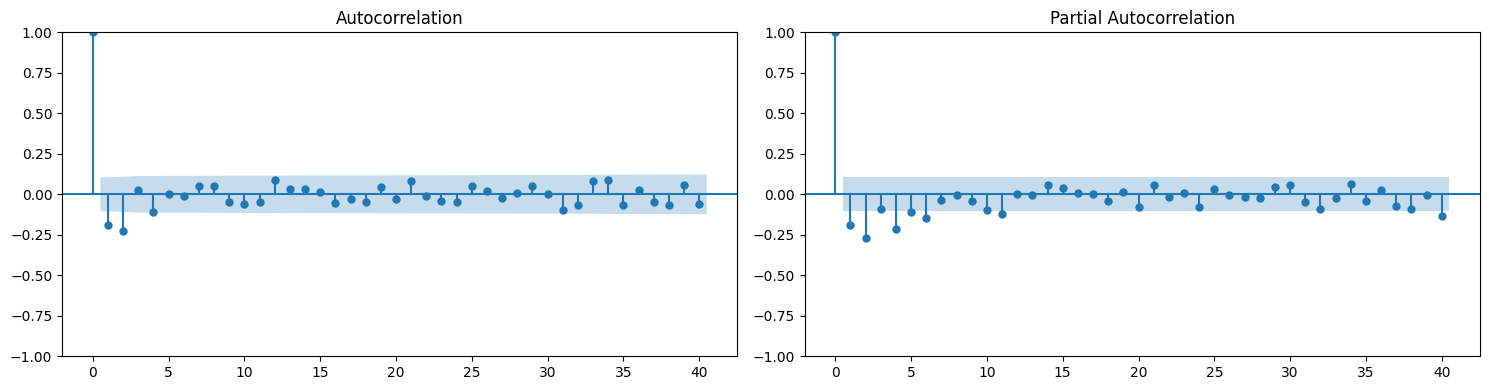

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 7183
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -2018.043
Date:                                Wed, 24 Apr 2024   AIC                           4046.086
Time:                                        03:49:49   BIC                           4080.466
Sample:                                    08-01-2002   HQIC                          4057.919
                                         - 03-31-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2372      0.047      5.056      0.000       0.145       0.329
ma.

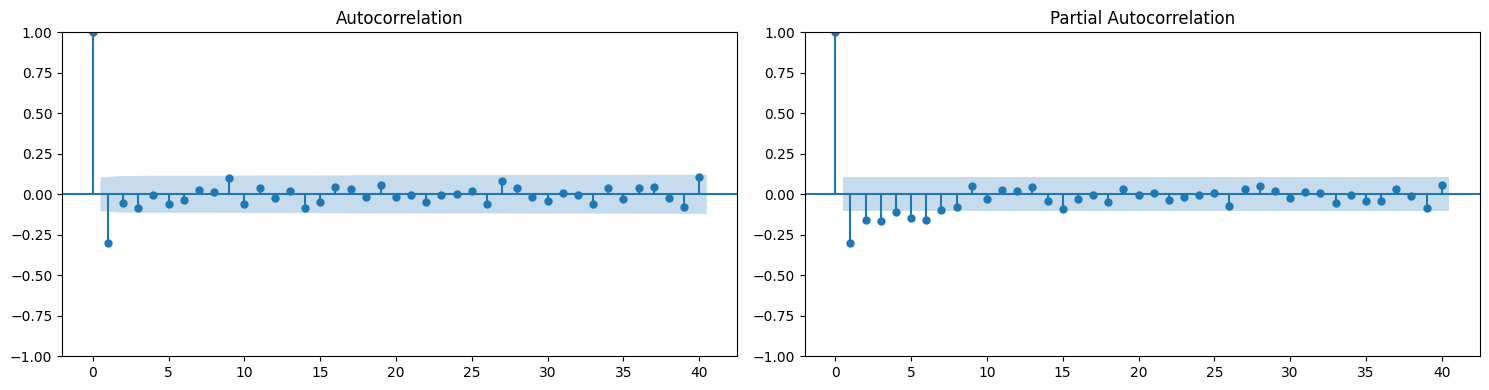

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 8521
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1896.025
Date:                                Wed, 24 Apr 2024   AIC                           3802.050
Time:                                        03:49:57   BIC                           3837.287
Sample:                                    02-01-1998   HQIC                          3814.075
                                         - 05-31-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0310      0.143      0.218      0.828      -0.248       0.310
ma.

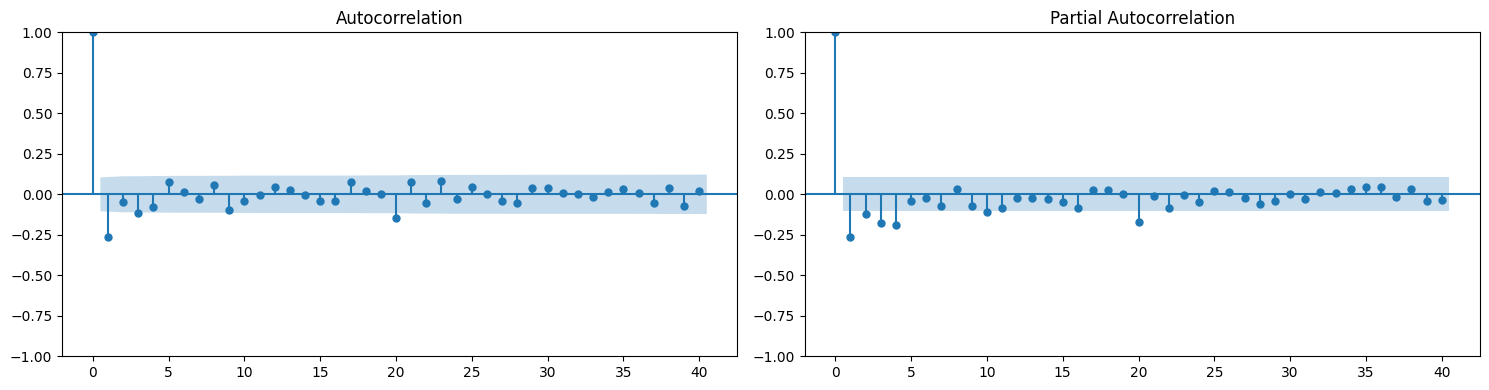

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 6271
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1830.144
Date:                                Wed, 24 Apr 2024   AIC                           3670.289
Time:                                        03:50:07   BIC                           3703.988
Sample:                                    07-01-2005   HQIC                          3681.968
                                         - 08-31-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0517      0.097     -0.533      0.594      -0.242       0.138
ma.

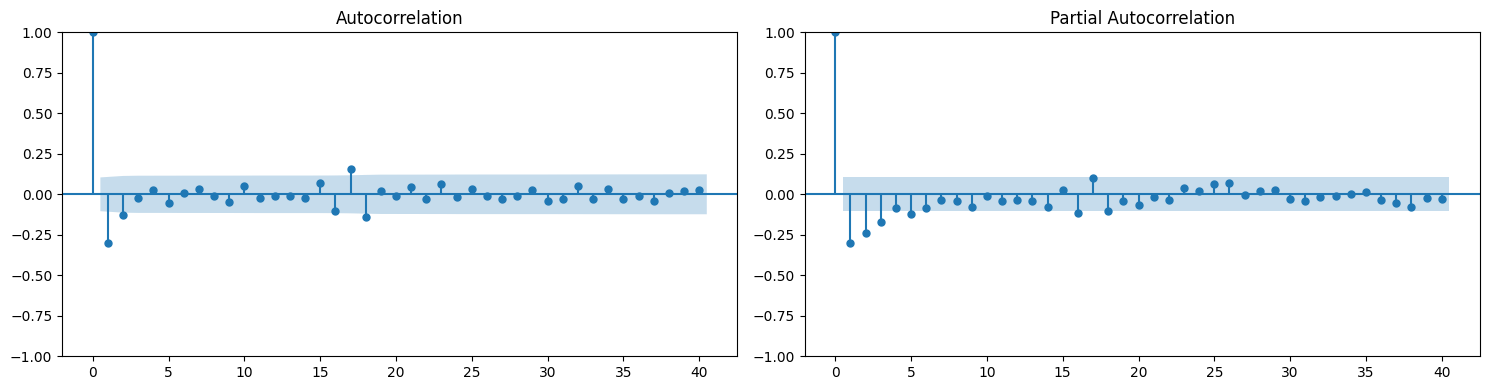

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 8827
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1868.194
Date:                                Wed, 24 Apr 2024   AIC                           3746.389
Time:                                        03:50:16   BIC                           3781.803
Sample:                                    06-01-1998   HQIC                          3758.452
                                         - 07-31-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2515      0.046      5.420      0.000       0.161       0.342
ma.

In [11]:
import os
path = '/content/drive/My Drive/data/datasets'
for f in os.listdir(path):
  print("FILENAME::",f)
  df = pd.read_csv(path+"/"+f, skiprows = 2)
  run_all(df)

DATA
                   GHI
Datetime              
1999-02-01  182.666667
1999-02-02  191.375000
1999-02-03  192.250000
1999-02-04   19.666667
1999-02-05   49.583333
*****************************************************************************************************************************
ADF TEST AND PACF ACF PLOTS
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value          -11.337342  1.075580e-20          5                     348
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value            -6.21803  5.306676e-08         13                     274


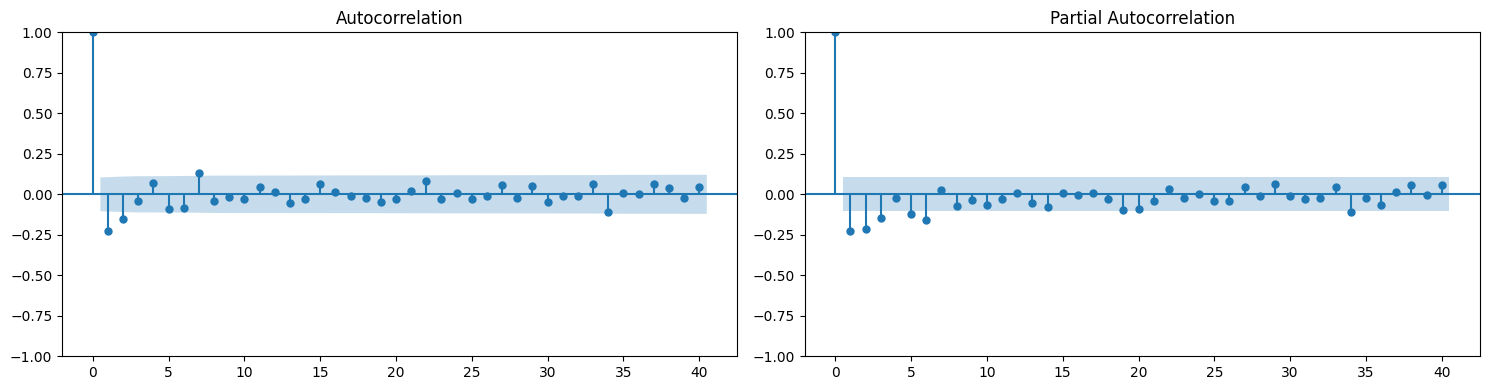

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 8278
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1861.015
Date:                                Tue, 23 Apr 2024   AIC                           3732.030
Time:                                        23:53:57   BIC                           3767.122
Sample:                                    02-01-1999   HQIC                          3744.022
                                         - 09-30-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0251      0.552      0.046      0.964      -1.056       1.107
ma.

In [ ]:
run_all(sb_ghi_ts)

DATA
                   GHI
Datetime              
1999-12-01  103.041667
1999-12-02  168.291667
1999-12-03  106.333333
1999-12-04  161.333333
1999-12-05  167.500000
*****************************************************************************************************************************
ADF TEST AND PACF ACF PLOTS
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value           -11.12087  3.468668e-20          6                     347
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value           -6.867212  1.548108e-09          7                     280


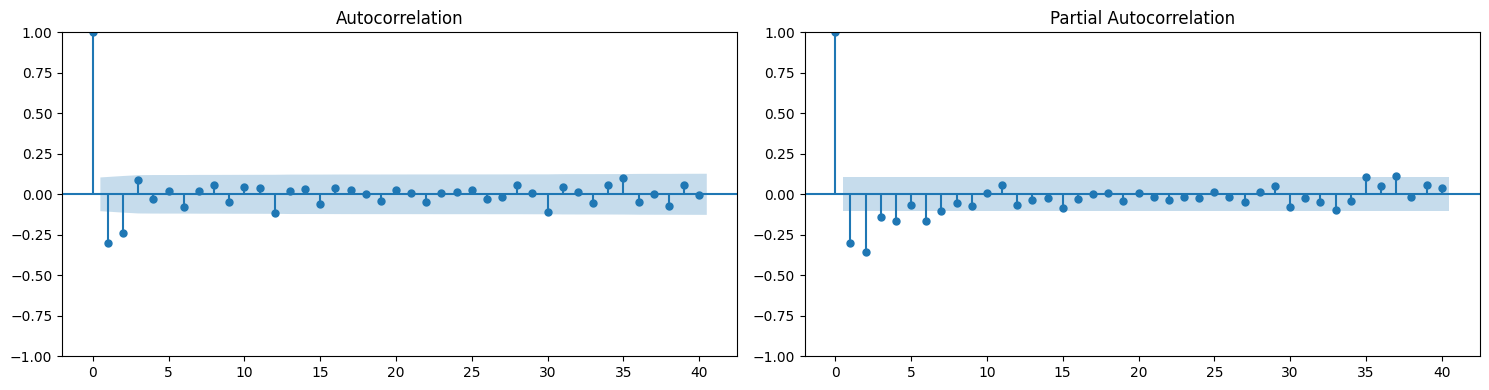

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 6422
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1833.278
Date:                                Tue, 23 Apr 2024   AIC                           3676.556
Time:                                        23:54:04   BIC                           3710.375
Sample:                                    12-01-1999   HQIC                          3688.262
                                         - 06-30-2017                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0959      0.089      1.081      0.280      -0.078       0.270
ma.

In [ ]:
run_all(ot_ghi_ts)

DATA
                   GHI
Datetime              
2001-01-01  133.083333
2001-01-02  129.208333
2001-01-03  136.833333
2001-01-04  135.750000
2001-01-05  121.208333
*****************************************************************************************************************************
ADF TEST AND PACF ACF PLOTS
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value           -7.619431  2.148043e-11         11                     341
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value           -5.812134  4.376414e-07          7                     273


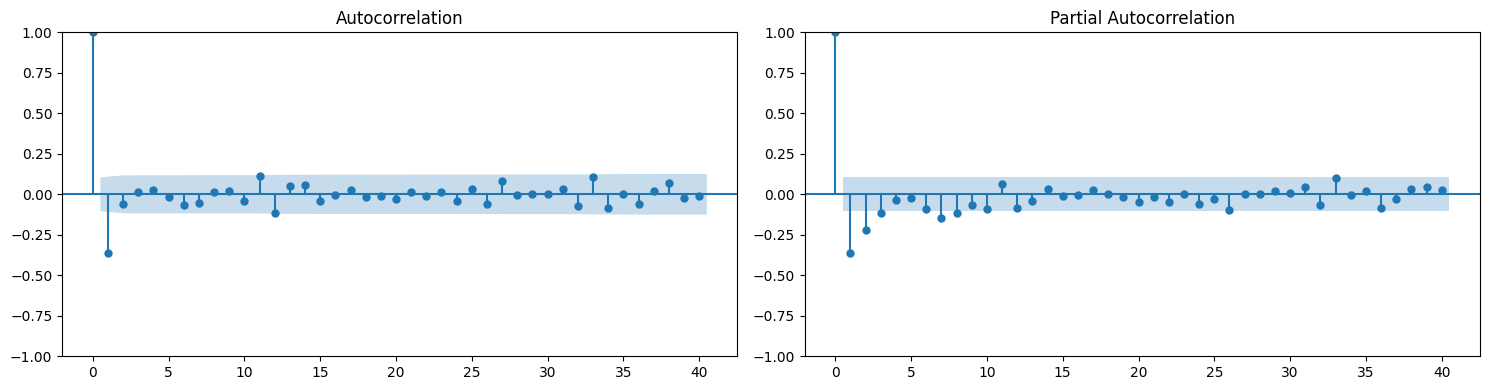

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 7760
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1770.410
Date:                                Tue, 23 Apr 2024   AIC                           3550.819
Time:                                        23:54:12   BIC                           3585.588
Sample:                                    01-01-2001   HQIC                          3562.740
                                         - 03-31-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0443      0.053      0.843      0.399      -0.059       0.147
ma.

In [ ]:
run_all(in_ghi_ts)

DATA
                   GHI
Datetime              
1998-12-01  144.500000
1998-12-02   60.208333
1998-12-03   97.666667
1998-12-04  137.083333
1998-12-05  148.333333
*****************************************************************************************************************************
ADF TEST AND PACF ACF PLOTS
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value          -12.518572  2.578601e-23          4                     348
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value           -6.137622  8.114889e-08         13                     267


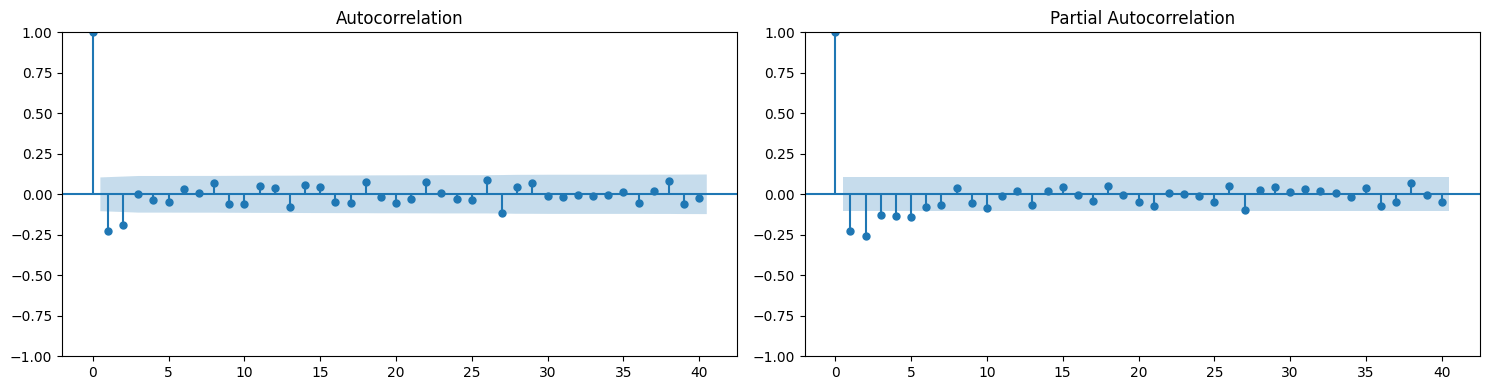

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 8098
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1785.765
Date:                                Tue, 23 Apr 2024   AIC                           3581.530
Time:                                        23:54:20   BIC                           3616.512
Sample:                                    12-01-1998   HQIC                          3593.498
                                         - 01-31-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5858      0.041     14.234      0.000       0.505       0.666
ma.

In [ ]:
run_all(hd_ghi_ts)

DATA
                   GHI
Datetime              
2000-09-01  255.041667
2000-09-02  285.291667
2000-09-03  286.833333
2000-09-04  259.250000
2000-09-05  267.708333
*****************************************************************************************************************************
ADF TEST AND PACF ACF PLOTS
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value           -8.072985  1.531779e-12         12                     342
       ADF Test Statistic       p-value  Lags Used  Number of Observations
Value           -7.777499  8.591126e-12         13                     281


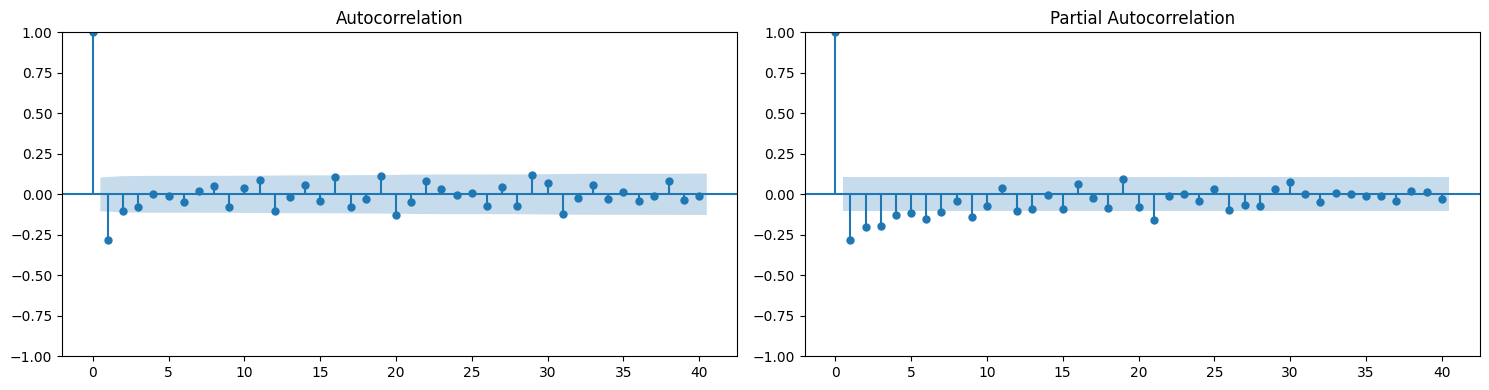

*****************************************************************************************************************************
SARIMA MODEL


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:                                    GHI   No. Observations:                 7305
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1854.116
Date:                                Tue, 23 Apr 2024   AIC                           3718.232
Time:                                        23:54:28   BIC                           3752.697
Sample:                                    09-01-2000   HQIC                          3730.085
                                         - 08-31-2020                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1950      0.060      3.244      0.001       0.077       0.313
ma.

In [ ]:
run_all(gl_ghi_ts)

In [ ]:
data = data_prep(ny_ghi_ts)
sarima = model(data)
sarima.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                    GHI   No. Observations:                 8035
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -2065.405
Date:                                Tue, 23 Apr 2024   AIC                           4140.809
Time:                                        22:54:57   BIC                           4175.752
Sample:                                    05-01-2000   HQIC                          4152.769
                                         - 04-30-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3120      0.040      7.739      0.000       0.233       0.391
ma.L1         -0.9999      0.006   -176.312      0.000      -1.011      -0.989
ma.S.L7       -0.3338      0.053     -6.293      0.000      -0.438      -0.230
ma.S.L14      -0.0898      0.055     -1.626      0.104      -0.198       0.018
sigma2      4560.9127    293.567     15.536      0.000    3985.532    5136.293
===================================================================================
Ljung-Box (L1) (Q):                  63.75   Jarque-Bera (JB):           3510209.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             2.03
Prob(H) (two-sided):                  0.00   Kurtosis:                       105.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
maricopa_ghi_ts['Datetime'] = pd.to_datetime(maricopa_ghi_ts[['Year', 'Month', 'Day', 'Hour', 'Minute']])
maricopa_ghi_ts.set_index('Datetime', inplace=True)


data = maricopa_ghi_ts.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1)

maricopa_ghi_ts['GHI'] = pd.to_numeric(maricopa_ghi_ts['GHI'], errors='coerce')

data_daily = maricopa_ghi_ts[['GHI']].resample('D').mean()


data_daily.head()

,GHI
Datetime,
2002-07-01,318.541667
2002-07-02,327.625000
2002-07-03,217.666667
2002-07-04,361.208333
2002-07-05,363.333333


In [ ]:
data_daily.sort_values(by='Datetime')

,GHI
Datetime,
2002-07-01,318.541667
2002-07-02,327.625000
2002-07-03,217.666667
2002-07-04,361.208333
2002-07-05,363.333333
...,...
2021-01-27,181.166667
2021-01-28,133.500000
2021-01-29,106.416667


In [ ]:
phoenix_ghi_ts['Datetime'] = pd.to_datetime(phoenix_ghi_ts[['Year', 'Month', 'Day', 'Hour', 'Minute']])
phoenix_ghi_ts.set_index('Datetime', inplace=True)


data = phoenix_ghi_ts.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1)

phoenix_ghi_ts['GHI'] = pd.to_numeric(phoenix_ghi_ts['GHI'], errors='coerce')

data_daily = phoenix_ghi_ts[['GHI']].resample('D').mean()


data_daily.head()

,Year,Month,Day,Hour,Minute,GHI,Temperature
Datetime,,,,,,,
2010-01-01 00:30:00,2010,1,1,0,30,0,3.9
2010-01-01 01:30:00,2010,1,1,1,30,0,3.8
2010-01-01 02:30:00,2010,1,1,2,30,0,3.9
2010-01-01 03:30:00,2010,1,1,3,30,0,3.9
2010-01-01 04:30:00,2010,1,1,4,30,0,3.8
...,...,...,...,...,...,...,...
2004-12-31 19:30:00,2004,12,31,19,30,0,6.8
2004-12-31 20:30:00,2004,12,31,20,30,0,6.2
2004-12-31 21:30:00,2004,12,31,21,30,0,5.8


In [ ]:
from statsmodels.tsa.stattools import adfuller

# First order differencing
data_diff = data_daily.diff().dropna()
data_seasonal_diff = data_daily.diff(7).dropna()

adf_test = adfuller(data_diff['GHI'])

# Create a DataFrame to display test results for better readability
adf_results = pd.DataFrame({
    'ADF Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations': adf_test[3],
    'Critical Values': adf_test[4],
}, index=['Value'])

print(adf_results.head())

adf_test = adfuller(data_seasonal_diff['GHI'])

adf_results = pd.DataFrame({
    'ADF Test Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Lags Used': adf_test[2],
    'Number of Observations': adf_test[3],
    'Critical Values': adf_test[4],
}, index=['Value'])

adf_results

       ADF Test Statistic       p-value  Lags Used  Number of Observations  \
Value          -11.894128  5.775639e-22          5                     347   

       Critical Values  
Value              NaN  


,ADF Test Statistic,p-value,Lags Used,Number of Observations,Critical Values
Value,-6.709795,3.705524e-09,7,273,NaN


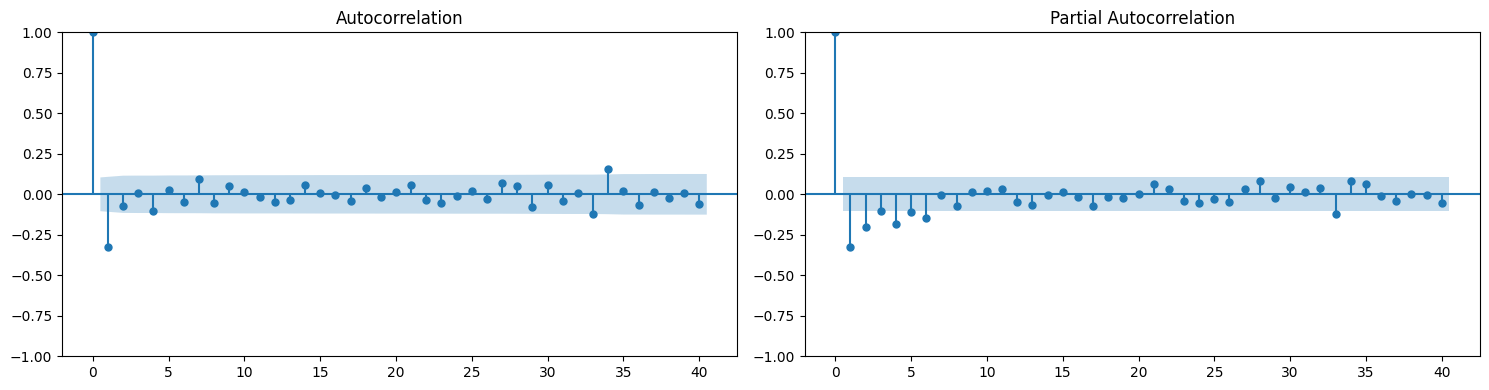

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(15, 4))


plot_acf(data_diff, ax=axes[0], lags=40)

plot_pacf(data_diff, ax=axes[1], lags=40)

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 1  # AR order
d = 1  # Differencing order
q = 1  # MA order

# Since we have daily data and the user is interested in weekly seasonality, we assume S=7
P = 0  # Seasonal AR order
D = 1  # Seasonal differencing order
Q = 2  # Seasonal MA order
S = 7  # Seasonal periodicity


sarima_model = SARIMAX(data_daily['GHI'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, S),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                    GHI   No. Observations:                 6790
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1728.329
Date:                                Sun, 14 Apr 2024   AIC                           3466.658
Time:                                        23:53:19   BIC                           3500.756
Sample:                                    07-01-2002   HQIC                          3478.428
                                         - 01-31-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3419      0.058      5.853      0.000       0.227       0.456
ma.L1         -0.8774      0.029    -30.105      0.000      -0.934      -0.820
ma.S.L7       -0.8854      4.083     -0.217      0.828      -8.887       7.117
ma.S.L14      -0.1146      0.465     -0.246      0.805      -1.027       0.797
sigma2      1218.2936   4973.762      0.245      0.806   -8530.101     1.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):           2086082.01
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -3.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        88.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ghi_forecast = sarima_result.forecast(steps=7)
print(ghi_forecast)

2021-02-01    148.877921
2021-02-02    146.951151
2021-02-03    150.796152
2021-02-04    142.153138
2021-02-05    134.437186
2021-02-06    148.582619
2021-02-07    149.393889
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Define the p, d, q ranges to try
p = q = range(0, 3)
d = range(1,3)
pdq = list(itertools.product(p, d, q))

# Define the P, D, Q, S ranges to try
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

best_score, best_cfg = float("inf"), None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(data_daily['GHI'],
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results = mod.fit(disp=False)

            # Replace with your preferred metric
            if results.aic < best_score:
                best_score, best_cfg = results.aic, (param, param_seasonal)
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

print('Best SARIMAX{}x{} - AIC:{}'.format(best_cfg[0], best_cfg[1], best_score))

SARIMAX(0, 0, 0)x(0, 0, 0, 7) - AIC:5073.926681460855
SARIMAX(0, 0, 0)x(0, 0, 1, 7) - AIC:4704.5366982327705
SARIMAX(0, 0, 0)x(0, 0, 2, 7) - AIC:4423.43000975611
SARIMAX(0, 0, 0)x(0, 1, 0, 7) - AIC:4099.851311739756
SARIMAX(0, 0, 0)x(0, 1, 1, 7) - AIC:3872.9451825533106
SARIMAX(0, 0, 0)x(0, 1, 2, 7) - AIC:3799.77118974481
SARIMAX(0, 0, 0)x(0, 2, 0, 7) - AIC:4996.840059614007
SARIMAX(0, 0, 0)x(0, 2, 1, 7) - AIC:3991.976854176382
SARIMAX(0, 0, 0)x(0, 2, 2, 7) - AIC:3789.508088938922
SARIMAX(0, 0, 0)x(1, 0, 0, 7) - AIC:4064.6237164210506
SARIMAX(0, 0, 0)x(1, 0, 1, 7) - AIC:4046.2844298283776
SARIMAX(0, 0, 0)x(1, 0, 2, 7) - AIC:3876.717602171505


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 1, 0, 7) - AIC:2049.8588118567072
SARIMAX(0, 0, 0)x(1, 1, 1, 7) - AIC:3874.8030002283685
SARIMAX(0, 0, 0)x(1, 1, 2, 7) - AIC:3800.685521850863


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 2, 0, 7) - AIC:2124.7830478894275


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 2, 1, 7) - AIC:3940.8096197879463


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 2, 2, 7) - AIC:3910.7371626451322
SARIMAX(0, 0, 0)x(2, 0, 0, 7) - AIC:3913.4207393934394


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(2, 0, 1, 7) - AIC:3950.968114292951


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(2, 0, 2, 7) - AIC:4113.048896511877
SARIMAX(0, 0, 0)x(2, 1, 0, 7) - AIC:3826.712043725687
SARIMAX(0, 0, 0)x(2, 1, 1, 7) - AIC:3764.357466167291


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(2, 1, 2, 7) - AIC:3754.939709688355
SARIMAX(0, 0, 0)x(2, 2, 0, 7) - AIC:4338.602433498434


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(2, 2, 1, 7) - AIC:3868.472349681828


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(2, 2, 2, 7) - AIC:3942.5953392179235
SARIMAX(0, 0, 1)x(0, 0, 0, 7) - AIC:4642.6875848569325
SARIMAX(0, 0, 1)x(0, 0, 1, 7) - AIC:4345.3070169903185
SARIMAX(0, 0, 1)x(0, 0, 2, 7) - AIC:4149.758089674993
SARIMAX(0, 0, 1)x(0, 1, 0, 7) - AIC:4020.6097514573466
SARIMAX(0, 0, 1)x(0, 1, 1, 7) - AIC:3753.1284379537806
SARIMAX(0, 0, 1)x(0, 1, 2, 7) - AIC:3668.2979781169192
SARIMAX(0, 0, 1)x(0, 2, 0, 7) - AIC:4916.119162983186
SARIMAX(0, 0, 1)x(0, 2, 1, 7) - AIC:3914.6337991464525
SARIMAX(0, 0, 1)x(0, 2, 2, 7) - AIC:3691.1489336202176
SARIMAX(0, 0, 1)x(1, 0, 0, 7) - AIC:3970.4810221792977


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 1, 7) - AIC:4039.7891015034784


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 2, 7) - AIC:3803.3690911950425


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 0, 7) - AIC:3898.008277622889
SARIMAX(0, 0, 1)x(1, 1, 1, 7) - AIC:3733.8509705356873
SARIMAX(0, 0, 1)x(1, 1, 2, 7) - AIC:3640.6925938231952


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 2, 0, 7) - AIC:4776.725672383263
SARIMAX(0, 0, 1)x(1, 2, 1, 7) - AIC:3824.941431374321
SARIMAX(0, 0, 1)x(1, 2, 2, 7) - AIC:3885.9543031016783


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(2, 0, 0, 7) - AIC:2236.1179132749503


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(2, 0, 1, 7) - AIC:4596.688652009459


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(2, 0, 2, 7) - AIC:4562.664090710673
SARIMAX(0, 0, 1)x(2, 1, 0, 7) - AIC:3747.1137210794886
SARIMAX(0, 0, 1)x(2, 1, 1, 7) - AIC:3666.2848543460636


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(2, 1, 2, 7) - AIC:3654.957760584029
SARIMAX(0, 0, 1)x(2, 2, 0, 7) - AIC:4305.075297716267
SARIMAX(0, 0, 1)x(2, 2, 1, 7) - AIC:3730.657728162483


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(2, 2, 2, 7) - AIC:3938.664750882906
SARIMAX(0, 0, 2)x(0, 0, 0, 7) - AIC:4398.9560193117495
SARIMAX(0, 0, 2)x(0, 0, 1, 7) - AIC:4181.489850647165
SARIMAX(0, 0, 2)x(0, 0, 2, 7) - AIC:4037.545748368331
SARIMAX(0, 0, 2)x(0, 1, 0, 7) - AIC:4005.913043945262
SARIMAX(0, 0, 2)x(0, 1, 1, 7) - AIC:3698.216460268118
SARIMAX(0, 0, 2)x(0, 2, 0, 7) - AIC:4905.73310762647
SARIMAX(0, 0, 2)x(0, 2, 1, 7) - AIC:3895.320870393507
SARIMAX(0, 0, 2)x(0, 2, 2, 7) - AIC:3870.872473649267


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 0, 0, 7) - AIC:3954.7295957049037


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 0, 1, 7) - AIC:3997.6086584775435


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 0, 2, 7) - AIC:4453.614193304112


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 1, 0, 7) - AIC:3883.416391690954
SARIMAX(0, 0, 2)x(1, 1, 1, 7) - AIC:3691.565035580625


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 1, 2, 7) - AIC:3617.8917658750024


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 2, 0, 7) - AIC:4770.242565936252
SARIMAX(0, 0, 2)x(1, 2, 1, 7) - AIC:3791.3902320408897


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(1, 2, 2, 7) - AIC:3866.5829538104053


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(2, 0, 0, 7) - AIC:3907.8259954277446
SARIMAX(0, 0, 2)x(2, 0, 1, 7) - AIC:4545.579361212794


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(2, 0, 2, 7) - AIC:4369.4029733770885
SARIMAX(0, 0, 2)x(2, 1, 0, 7) - AIC:3723.3674289002633
SARIMAX(0, 0, 2)x(2, 1, 1, 7) - AIC:3627.377761113433


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(2, 1, 2, 7) - AIC:3597.225579325603
SARIMAX(0, 0, 2)x(2, 2, 0, 7) - AIC:4424.719480259928


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(2, 2, 1, 7) - AIC:3709.3825850438307


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(2, 2, 2, 7) - AIC:3991.596538479182
SARIMAX(0, 1, 0)x(0, 0, 0, 7) - AIC:3758.1384540260365
SARIMAX(0, 1, 0)x(0, 0, 1, 7) - AIC:3692.86038665853
SARIMAX(0, 1, 0)x(0, 0, 2, 7) - AIC:3611.8303628876556
SARIMAX(0, 1, 0)x(0, 1, 0, 7) - AIC:4211.1407276254995
SARIMAX(0, 1, 0)x(0, 1, 1, 7) - AIC:3643.188911472278
SARIMAX(0, 1, 0)x(0, 1, 2, 7) - AIC:3576.4070651092215
SARIMAX(0, 1, 0)x(0, 2, 0, 7) - AIC:5149.930883711206
SARIMAX(0, 1, 0)x(0, 2, 1, 7) - AIC:4256.493512448191
SARIMAX(0, 1, 0)x(0, 2, 2, 7) - AIC:3854.6959611476022
SARIMAX(0, 1, 0)x(1, 0, 0, 7) - AIC:3702.983549982983


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 0, 1, 7) - AIC:1317.2994264357458
SARIMAX(0, 1, 0)x(1, 0, 2, 7) - AIC:3613.829510116955


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 0, 7) - AIC:1855.144696174831
SARIMAX(0, 1, 0)x(1, 1, 1, 7) - AIC:3645.037323195824
SARIMAX(0, 1, 0)x(1, 1, 2, 7) - AIC:3577.45749954544


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 2, 0, 7) - AIC:2199.536506356043


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 2, 1, 7) - AIC:4014.818106637831
SARIMAX(0, 1, 0)x(1, 2, 2, 7) - AIC:3842.3106713339307
SARIMAX(0, 1, 0)x(2, 0, 0, 7) - AIC:3622.684624375577
SARIMAX(0, 1, 0)x(2, 0, 1, 7) - AIC:3624.521833935243
SARIMAX(0, 1, 0)x(2, 0, 2, 7) - AIC:3594.2910846540185
SARIMAX(0, 1, 0)x(2, 1, 0, 7) - AIC:3872.542685582589
SARIMAX(0, 1, 0)x(2, 1, 1, 7) - AIC:3583.341712970147


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(2, 1, 2, 7) - AIC:3603.847997385623
SARIMAX(0, 1, 0)x(2, 2, 0, 7) - AIC:4529.702307278536


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(2, 2, 1, 7) - AIC:4801.013750042053
SARIMAX(0, 1, 0)x(2, 2, 2, 7) - AIC:3884.539501668669
SARIMAX(0, 1, 1)x(0, 0, 0, 7) - AIC:3680.7391687048507
SARIMAX(0, 1, 1)x(0, 0, 1, 7) - AIC:3615.448354151666
SARIMAX(0, 1, 1)x(0, 0, 2, 7) - AIC:3539.066553434921
SARIMAX(0, 1, 1)x(0, 1, 0, 7) - AIC:4145.563829482672
SARIMAX(0, 1, 1)x(0, 1, 1, 7) - AIC:3570.791200038636
SARIMAX(0, 1, 1)x(0, 1, 2, 7) - AIC:3502.275294416921
SARIMAX(0, 1, 1)x(0, 2, 0, 7) - AIC:5092.333970827029
SARIMAX(0, 1, 1)x(0, 2, 1, 7) - AIC:4172.986923720347


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 2, 2, 7) - AIC:3899.925914961913
SARIMAX(0, 1, 1)x(1, 0, 0, 7) - AIC:3634.4147227047806
SARIMAX(0, 1, 1)x(1, 0, 1, 7) - AIC:3604.1355611370254
SARIMAX(0, 1, 1)x(1, 0, 2, 7) - AIC:3540.0785234506498


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 0, 7) - AIC:4027.5974735246245
SARIMAX(0, 1, 1)x(1, 1, 1, 7) - AIC:3572.539546428774


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 2, 7) - AIC:3533.334047199356


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 2, 0, 7) - AIC:4939.838792706274
SARIMAX(0, 1, 1)x(1, 2, 1, 7) - AIC:4127.755601936719


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 2, 2, 7) - AIC:4016.9760438801904
SARIMAX(0, 1, 1)x(2, 0, 0, 7) - AIC:3558.223458064116
SARIMAX(0, 1, 1)x(2, 0, 1, 7) - AIC:3560.224368377533
SARIMAX(0, 1, 1)x(2, 0, 2, 7) - AIC:3529.3214750189163
SARIMAX(0, 1, 1)x(2, 1, 0, 7) - AIC:3795.190209428295
SARIMAX(0, 1, 1)x(2, 1, 1, 7) - AIC:3522.298059233695


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(2, 1, 2, 7) - AIC:3555.000627139818


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(2, 2, 0, 7) - AIC:4519.811919938975


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(2, 2, 1, 7) - AIC:4814.022915238182
SARIMAX(0, 1, 1)x(2, 2, 2, 7) - AIC:4071.4370800975776
SARIMAX(0, 1, 2)x(0, 0, 0, 7) - AIC:3645.305404441465
SARIMAX(0, 1, 2)x(0, 0, 1, 7) - AIC:3581.6521251110657
SARIMAX(0, 1, 2)x(0, 0, 2, 7) - AIC:3505.521109069504
SARIMAX(0, 1, 2)x(0, 1, 0, 7) - AIC:4026.8992283713774
SARIMAX(0, 1, 2)x(0, 1, 1, 7) - AIC:3536.5339412062453
SARIMAX(0, 1, 2)x(0, 1, 2, 7) - AIC:3465.898177797999
SARIMAX(0, 1, 2)x(0, 2, 0, 7) - AIC:4904.703366933407
SARIMAX(0, 1, 2)x(0, 2, 1, 7) - AIC:4135.321980070774


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 2)x(0, 2, 2, 7) - AIC:3883.979884989035
SARIMAX(0, 1, 2)x(1, 0, 0, 7) - AIC:3609.6205040915575
SARIMAX(0, 1, 2)x(1, 0, 1, 7) - AIC:3582.903360256507
SARIMAX(0, 1, 2)x(1, 0, 2, 7) - AIC:3505.735922144047


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 2)x(1, 1, 0, 7) - AIC:4019.7976802145918
SARIMAX(0, 1, 2)x(1, 1, 1, 7) - AIC:3538.328694911862


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 2)x(1, 1, 2, 7) - AIC:3465.850283794476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 2)x(1, 2, 0, 7) - AIC:1994.6872237750808
SARIMAX(0, 1, 2)x(1, 2, 1, 7) - AIC:4094.0244743261037


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 2)x(1, 2, 2, 7) - AIC:3972.0244619437854
SARIMAX(0, 1, 2)x(2, 0, 0, 7) - AIC:3535.6784122693216
SARIMAX(0, 1, 2)x(2, 0, 1, 7) - AIC:3537.2895112671667
SARIMAX(0, 1, 2)x(2, 0, 2, 7) - AIC:3501.4035831741667


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 2)x(2, 1, 0, 7) - AIC:3752.482043953408
SARIMAX(0, 1, 2)x(2, 1, 1, 7) - AIC:3500.011067969178


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 2)x(2, 1, 2, 7) - AIC:3486.7663138023845
SARIMAX(0, 1, 2)x(2, 2, 0, 7) - AIC:4320.311331042327


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 2)x(2, 2, 1, 7) - AIC:4806.496525339569
SARIMAX(0, 1, 2)x(2, 2, 2, 7) - AIC:4052.5670043282776
SARIMAX(0, 2, 0)x(0, 0, 0, 7) - AIC:4242.115671417603
SARIMAX(0, 2, 0)x(0, 0, 1, 7) - AIC:4166.145047981679
SARIMAX(0, 2, 0)x(0, 0, 2, 7) - AIC:4073.201537936254


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(0, 1, 0, 7) - AIC:9831.129899438665
SARIMAX(0, 2, 0)x(0, 1, 1, 7) - AIC:4113.352393305922
SARIMAX(0, 2, 0)x(0, 1, 2, 7) - AIC:4036.4653152652627


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(0, 2, 0, 7) - AIC:10880.070870566029
SARIMAX(0, 2, 0)x(0, 2, 1, 7) - AIC:4794.927776594756
SARIMAX(0, 2, 0)x(0, 2, 2, 7) - AIC:4341.081228201197
SARIMAX(0, 2, 0)x(1, 0, 0, 7) - AIC:4178.7681102137685
SARIMAX(0, 2, 0)x(1, 0, 1, 7) - AIC:4103.406560309379


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(1, 0, 2, 7) - AIC:1822.3434911052946
SARIMAX(0, 2, 0)x(1, 1, 0, 7) - AIC:4557.96584469964


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(1, 1, 1, 7) - AIC:4560.434612208332


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(1, 1, 2, 7) - AIC:1245.3346663997258


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(1, 2, 0, 7) - AIC:5491.1281397798975
SARIMAX(0, 2, 0)x(1, 2, 1, 7) - AIC:4710.722158608374


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(1, 2, 2, 7) - AIC:5078.105768924094
SARIMAX(0, 2, 0)x(2, 0, 0, 7) - AIC:4088.347411826342


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(2, 0, 1, 7) - AIC:4032.760792743261
SARIMAX(0, 2, 0)x(2, 0, 2, 7) - AIC:4021.0380024832075


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(2, 1, 0, 7) - AIC:4412.805392828033
SARIMAX(0, 2, 0)x(2, 1, 1, 7) - AIC:4041.014601195565


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(2, 1, 2, 7) - AIC:1838.645022918442


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(2, 2, 0, 7) - AIC:5262.780544620702


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(2, 2, 1, 7) - AIC:5250.914693296067


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 0)x(2, 2, 2, 7) - AIC:5366.971100241964
SARIMAX(0, 2, 1)x(0, 0, 0, 7) - AIC:3767.7986067591564
SARIMAX(0, 2, 1)x(0, 0, 1, 7) - AIC:3702.1842539850663
SARIMAX(0, 2, 1)x(0, 0, 2, 7) - AIC:3622.413018841735
SARIMAX(0, 2, 1)x(0, 1, 0, 7) - AIC:4247.974490573297
SARIMAX(0, 2, 1)x(0, 1, 1, 7) - AIC:3783.900499521481
SARIMAX(0, 2, 1)x(0, 1, 2, 7) - AIC:3710.576890066937
SARIMAX(0, 2, 1)x(0, 2, 0, 7) - AIC:5254.153701012622
SARIMAX(0, 2, 1)x(0, 2, 1, 7) - AIC:4408.00342620604


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(0, 2, 2, 7) - AIC:4136.194806058011
SARIMAX(0, 2, 1)x(1, 0, 0, 7) - AIC:3720.8672680589916


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 0, 1, 7) - AIC:3676.420317718177


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 0, 2, 7) - AIC:3612.189218198418
SARIMAX(0, 2, 1)x(1, 1, 0, 7) - AIC:4018.3341742046982
SARIMAX(0, 2, 1)x(1, 1, 1, 7) - AIC:3785.565744291189
SARIMAX(0, 2, 1)x(1, 1, 2, 7) - AIC:3711.688438960695


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 2, 0, 7) - AIC:4821.109697240483
SARIMAX(0, 2, 1)x(1, 2, 1, 7) - AIC:2210.469742786228


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 2, 2, 7) - AIC:4276.824357506588
SARIMAX(0, 2, 1)x(2, 0, 0, 7) - AIC:3643.1623701151702
SARIMAX(0, 2, 1)x(2, 0, 1, 7) - AIC:3634.79273272008
SARIMAX(0, 2, 1)x(2, 0, 2, 7) - AIC:3621.3675510919716


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(2, 1, 0, 7) - AIC:3880.3154388842195
SARIMAX(0, 2, 1)x(2, 1, 1, 7) - AIC:3736.269051070928
SARIMAX(0, 2, 1)x(2, 1, 2, 7) - AIC:3713.0302502015074
SARIMAX(0, 2, 1)x(2, 2, 0, 7) - AIC:4890.427523743693
SARIMAX(0, 2, 1)x(2, 2, 1, 7) - AIC:4301.1408028179485


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(2, 2, 2, 7) - AIC:1961.9916653295754
SARIMAX(0, 2, 2)x(0, 0, 0, 7) - AIC:3695.8187541394145
SARIMAX(0, 2, 2)x(0, 0, 1, 7) - AIC:3631.317751336453


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(0, 0, 2, 7) - AIC:3553.8322720520578
SARIMAX(0, 2, 2)x(0, 1, 0, 7) - AIC:4136.550267857797


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(0, 1, 1, 7) - AIC:3710.6999543152892
SARIMAX(0, 2, 2)x(0, 1, 2, 7) - AIC:3648.7306496097726
SARIMAX(0, 2, 2)x(0, 2, 0, 7) - AIC:5192.103056998873


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(0, 2, 1, 7) - AIC:4336.714642072649


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(0, 2, 2, 7) - AIC:4157.771831409031
SARIMAX(0, 2, 2)x(1, 0, 0, 7) - AIC:3658.6895761937976
SARIMAX(0, 2, 2)x(1, 0, 1, 7) - AIC:3630.903809835876


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 0, 2, 7) - AIC:3556.4832090795226


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 1, 0, 7) - AIC:4011.1231220797704


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 1, 1, 7) - AIC:3718.2600196050707
SARIMAX(0, 2, 2)x(1, 1, 2, 7) - AIC:3635.2926992786297


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 2, 0, 7) - AIC:4876.162319266574


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 2, 1, 7) - AIC:4288.896177308433


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(1, 2, 2, 7) - AIC:4272.573239296804
SARIMAX(0, 2, 2)x(2, 0, 0, 7) - AIC:3584.9465557812478
SARIMAX(0, 2, 2)x(2, 0, 1, 7) - AIC:3587.1016025337512
SARIMAX(0, 2, 2)x(2, 0, 2, 7) - AIC:3558.095659494151
SARIMAX(0, 2, 2)x(2, 1, 0, 7) - AIC:3919.096518633531


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(2, 1, 1, 7) - AIC:3685.264179898683


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(2, 1, 2, 7) - AIC:3644.581696352817


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(2, 2, 0, 7) - AIC:4732.58561771892


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(2, 2, 1, 7) - AIC:4256.5791202061955


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 2)x(2, 2, 2, 7) - AIC:4266.5853603824435
SARIMAX(1, 0, 0)x(0, 0, 0, 7) - AIC:3751.8308718934995
SARIMAX(1, 0, 0)x(0, 0, 1, 7) - AIC:3688.5077970291604
SARIMAX(1, 0, 0)x(0, 0, 2, 7) - AIC:3609.8361266869974


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 0, 7) - AIC:4022.6836720582965
SARIMAX(1, 0, 0)x(0, 1, 1, 7) - AIC:3598.9568173047696
SARIMAX(1, 0, 0)x(0, 1, 2, 7) - AIC:3532.083928812599


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 2, 0, 7) - AIC:4965.422497989875
SARIMAX(1, 0, 0)x(0, 2, 1, 7) - AIC:3906.885264135408
SARIMAX(1, 0, 0)x(0, 2, 2, 7) - AIC:3830.6476694842904
SARIMAX(1, 0, 0)x(1, 0, 0, 7) - AIC:3688.573254625751
SARIMAX(1, 0, 0)x(1, 0, 1, 7) - AIC:3688.845236883444
SARIMAX(1, 0, 0)x(1, 0, 2, 7) - AIC:3623.35134460192
SARIMAX(1, 0, 0)x(1, 1, 0, 7) - AIC:3822.213237900975
SARIMAX(1, 0, 0)x(1, 1, 1, 7) - AIC:3600.9505920833567


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 1, 2, 7) - AIC:969.1396154094003


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 2, 0, 7) - AIC:2062.3321832109746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 2, 1, 7) - AIC:3884.087370530313


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 2, 2, 7) - AIC:2159.832561650761
SARIMAX(1, 0, 0)x(2, 0, 0, 7) - AIC:3609.9157031764717
SARIMAX(1, 0, 0)x(2, 0, 1, 7) - AIC:3611.8947303943273
SARIMAX(1, 0, 0)x(2, 0, 2, 7) - AIC:3613.585046667239
SARIMAX(1, 0, 0)x(2, 1, 0, 7) - AIC:3700.144850175295


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(2, 1, 1, 7) - AIC:1202.822720467466


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(2, 1, 2, 7) - AIC:3746.2688860457556
SARIMAX(1, 0, 0)x(2, 2, 0, 7) - AIC:4288.842200597313


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(2, 2, 1, 7) - AIC:3773.131089200002


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(2, 2, 2, 7) - AIC:3831.372676515495
SARIMAX(1, 0, 1)x(0, 0, 0, 7) - AIC:3688.1698491921734
SARIMAX(1, 0, 1)x(0, 0, 1, 7) - AIC:3623.963324653824
SARIMAX(1, 0, 1)x(0, 0, 2, 7) - AIC:3558.8513189219657


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 0, 7) - AIC:4015.311836009586


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 7) - AIC:858.5675672170894


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 2, 7) - AIC:829.9975782443747


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 2, 0, 7) - AIC:4957.661684546849


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 2, 1, 7) - AIC:4058.4633858574475
SARIMAX(1, 0, 1)x(0, 2, 2, 7) - AIC:3847.289170995875


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 0, 0, 7) - AIC:3633.4383445085127
SARIMAX(1, 0, 1)x(1, 0, 1, 7) - AIC:3634.910689073976


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 0, 2, 7) - AIC:3582.7699393300745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 1, 0, 7) - AIC:1865.3746740864106


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 1, 1, 7) - AIC:1214.3213658522784


In [ ]:
import requests
import pandas as pd
import urllib.parse
import time

API_KEY = "nqZ3IaRBop6ZcM8PoXqhF6WVBikX8cZGGxnCuxSK"
EMAIL = "jayantbabu@icloud.com"
BASE_URL = "https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-2-2-download.json?"
POINTS = [
'220506'
]

def main():
    input_data = {
        'attributes': 'ghi,air_temperature',
        'interval': '60',

        'api_key': API_KEY,
        'email': EMAIL,
    }
    for name in ['1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']:
        print(f"Processing name: {name}")
        for id, location_ids in enumerate(POINTS):
            input_data['names'] = [name]
            input_data['location_ids'] = location_ids
            print(f'Making request for point group {id + 1} of {len(POINTS)}...')

            if '.csv' in BASE_URL:
                url = BASE_URL + urllib.parse.urlencode(data, True)
                # Note: CSV format is only supported for single point requests
                # Suggest that you might append to a larger data frame
                data = pd.read_csv(url)
                print(f'Response data (you should replace this print statement with your processing): {data}')
                # You can use the following code to write it to a file
                # data.to_csv('SingleBigDataPoint.csv')
            else:
                headers = {
                  'x-api-key': API_KEY
                }
                data = get_response_json_and_handle_errors(requests.post(BASE_URL, input_data, headers=headers))
                download_url = data['outputs']['downloadUrl']
                # You can do with what you will the download url
                print(data['outputs']['message'])
                print(f"Data can be downloaded from this url when ready: {download_url}")

                # Delay for 1 second to prevent rate limiting
                time.sleep(1)
            print(f'Processed')


def get_response_json_and_handle_errors(response: requests.Response) -> dict:
    """Takes the given response and handles any errors, along with providing
    the resulting json

    Parameters
    ----------
    response : requests.Response
        The response object

    Returns
    -------
    dict
        The resulting json
    """
    if response.status_code != 200:
        print(f"An error has occurred with the server or the request. The request response code/status: {response.status_code} {response.reason}")
        print(f"The response body: {response.text}")
        exit(1)

    try:
        response_json = response.json()
    except:
        print(f"The response couldn't be parsed as JSON, likely an issue with the server, here is the text: {response.text}")
        exit(1)

    if len(response_json['errors']) > 0:
        errors = '\n'.join(response_json['errors'])
        print(f"The request errored out, here are the errors: {errors}")
        exit(1)
    return response_json

if __name__ == "__main__":
    main()

Processing name: 1998
Making request for point group 1 of 1...
File generation in progress. An email will be sent to jayantbabu@icloud.com when the download is ready.
Data can be downloaded from this url when ready: https://mapfiles.nrel.gov/data/solar/5c853c1170573faf8423f5655af8bee8.zip
Processed
Processing name: 1999
Making request for point group 1 of 1...
File generation in progress. An email will be sent to jayantbabu@icloud.com when the download is ready.
Data can be downloaded from this url when ready: https://mapfiles.nrel.gov/data/solar/a34de73c1ef1121fea4dc1bf4f7f864c.zip
Processed
Processing name: 2000
Making request for point group 1 of 1...
File generation in progress. An email will be sent to jayantbabu@icloud.com when the download is ready.
Data can be downloaded from this url when ready: https://mapfiles.nrel.gov/data/solar/9cfeb33a608824cebbe42698c2056937.zip
Processed
Processing name: 2001
Making request for point group 1 of 1...
File generation in progress. An email

KeyboardInterrupt: 

In [3]:
import requests
import pandas as pd
import urllib.parse
import time

API_KEY = "nqZ3IaRBop6ZcM8PoXqhF6WVBikX8cZGGxnCuxSK"
EMAIL = "jayantbabu@icloud.com"
BASE_URL = "https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-2-2-tmy-download.json?"
POINTS = [
'1150521', '321898', '278301', '332423', '1027389', '616782', '189933', '1061342', '166738', '1004458'
]

def main():
    input_data = {
        'attributes': 'ghi,air_temperature',
        'interval': '60',

        'api_key': API_KEY,
        'email': EMAIL,
    }
    for name in ['tdy-2022']:
        print(f"Processing name: {name}")
        for id, location_ids in enumerate(POINTS):
            input_data['names'] = [name]
            input_data['location_ids'] = location_ids
            print(f'Making request for point group {id + 1} of {len(POINTS)}...')

            if '.csv' in BASE_URL:
                url = BASE_URL + urllib.parse.urlencode(data, True)
                # Note: CSV format is only supported for single point requests
                # Suggest that you might append to a larger data frame
                data = pd.read_csv(url)
                print(f'Response data (you should replace this print statement with your processing): {data}')
                # You can use the following code to write it to a file
                # data.to_csv('SingleBigDataPoint.csv')
            else:
                headers = {
                  'x-api-key': API_KEY
                }
                data = get_response_json_and_handle_errors(requests.post(BASE_URL, input_data, headers=headers))
                download_url = data['outputs']['downloadUrl']
                # You can do with what you will the download url
                print(data['outputs']['message'])
                print(f"Data can be downloaded from this url when ready: {download_url}")

                # Delay for 1 second to prevent rate limiting
                time.sleep(1)
            print(f'Processed')


def get_response_json_and_handle_errors(response: requests.Response) -> dict:
    """Takes the given response and handles any errors, along with providing
    the resulting json

    Parameters
    ----------
    response : requests.Response
        The response object

    Returns
    -------
    dict
        The resulting json
    """
    if response.status_code != 200:
        print(f"An error has occurred with the server or the request. The request response code/status: {response.status_code} {response.reason}")
        print(f"The response body: {response.text}")
        exit(1)

    try:
        response_json = response.json()
    except:
        print(f"The response couldn't be parsed as JSON, likely an issue with the server, here is the text: {response.text}")
        exit(1)

    if len(response_json['errors']) > 0:
        errors = '\n'.join(response_json['errors'])
        print(f"The request errored out, here are the errors: {errors}")
        exit(1)
    return response_json

if __name__ == "__main__":
    main()

Processing name: tdy-2022
Making request for point group 1 of 10...
File generation in progress. An email will be sent to jayantbabu@icloud.com when the download is ready.
Data can be downloaded from this url when ready: https://mapfiles.nrel.gov/data/solar/91bb3e39e894f8b044de2cd83faac9b1.zip
Processed
Making request for point group 2 of 10...
File generation in progress. An email will be sent to jayantbabu@icloud.com when the download is ready.
Data can be downloaded from this url when ready: https://mapfiles.nrel.gov/data/solar/9119b74c5896aa6d02cf96825d377413.zip
Processed
Making request for point group 3 of 10...
File generation in progress. An email will be sent to jayantbabu@icloud.com when the download is ready.
Data can be downloaded from this url when ready: https://mapfiles.nrel.gov/data/solar/5217af990547edb77582ec2e87d7e05d.zip
Processed
Making request for point group 4 of 10...
File generation in progress. An email will be sent to jayantbabu@icloud.com when the download i